# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Packages for date conversions
from datetime import datetime
from datetime import date
from datetime import timedelta

## Task 1: Load the Data

In [2]:
# Load dataset into a dataframe
data = pd.read_excel('Online Retail.xlsx')

# Display first few rows of the dataframe
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2 : Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

### Gather basic information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Gather descriptive statistics about the data

In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
def categorical_info(df):
    cat_cols = df.select_dtypes(include='object').columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []
    
    for col in cat_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
    return pd.DataFrame({'Feature Name': feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val})

In [6]:
categorical_info(data)

,Feature Name,Number of Unique Value,Name of Unique Values
0,InvoiceNo,25900,"[536365, 536366, 536367, 536368, 536369, 53637..."
1,StockCode,4070,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
2,Description,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
3,Country,38,"[United Kingdom, France, Australia, Netherland..."


## Task 3 : Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 

### Check missing values

In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Filling missing values

In [8]:
description = data['Description']
description=description.fillna('*')
descr=[]
for i in description:
    if i=='*':
        value=data[data['StockCode']==data['StockCode'][description[description==i].index[0]]]['Description'].mode()[0]
        descr.append(value)
    elif i=='?':
        value=data[data['StockCode']==data['StockCode'][description[description==i].index[0]]]['Description'].mode()[0]
        descr.append(value)
    else:
        descr.append(i)
        
data['Description'] = descr
data['CustomerID'] = data['CustomerID'].fillna('')

### Check duplicates

In [9]:
data.duplicated().sum()

5268

In [10]:
# Inspect some rows containing duplicates as needed
data[data.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Task 4 : Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

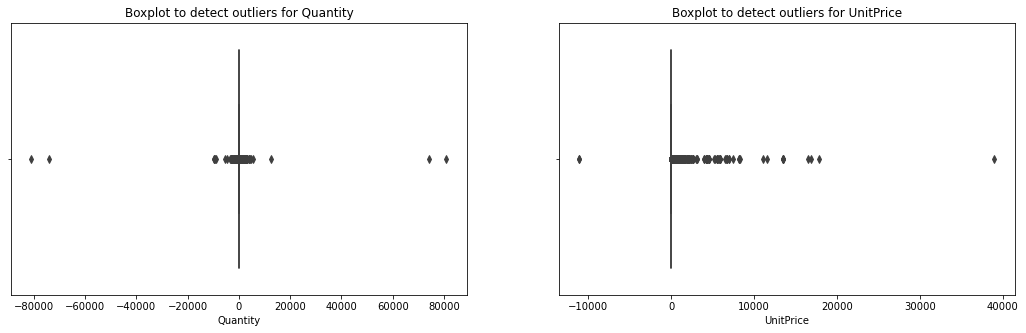

In [12]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18,5))
sns.boxplot(x=df1['Quantity'],ax=ax[0])
ax[0].set_title('Boxplot to detect outliers for Quantity', fontsize=12)
sns.boxplot(x=df1['UnitPrice'],ax=ax[1])
ax[1].set_title('Boxplot to detect outliers for UnitPrice', fontsize=12)
None

The boxplot above shows that there are outliers in the `Quantity` and `UnitPrice` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the both the column.

In [13]:
# Determine the number of rows containing outliers in `Quantity`

# Compute the 25th percentile value in `Quantity`
percentile25 = df1['Quantity'].quantile(0.25)

# Compute the 75th percentile value in `Quantity`
percentile75 = df1['Quantity'].quantile(0.75)

# Compute the interquartile range in `Quantity`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `Quantity`
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `Quantity`
outliers = df1[(df1['Quantity'] > upper_limit) | (df1['Quantity'] < lower_limit)]

# Count how many rows in the data contain outliers in `Quantity`
print("Number of rows in the data containing outliers in `Quantity`:", len(outliers))

Lower limit: -12.5
Upper limit: 23.5
Number of rows in the data containing outliers in `Quantity`: 58501


In [14]:
# Determine the number of rows containing outliers in `UnitPrice`

# Compute the 25th percentile value in `UnitPrice`
percentile25 = df1['UnitPrice'].quantile(0.25)

# Compute the 75th percentile value in `UnitPrice`
percentile75 = df1['UnitPrice'].quantile(0.75)

# Compute the interquartile range in `UnitPrice`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `UnitPrice`
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `UnitPrice`
outliers = df1[(df1['UnitPrice'] > upper_limit) | (df1['UnitPrice'] < lower_limit)]

# Count how many rows in the data contain outliers in `UnitPrice`
print("Number of rows in the data containing outliers in `UnitPrice`:", len(outliers))

Lower limit: -3.0700000000000003
Upper limit: 8.45
Number of rows in the data containing outliers in `UnitPrice`: 39450


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

## Task 5 : Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales

In [15]:
# Create year,month and day columns for visualization
df1['year_month']=df1['InvoiceDate'].dt.to_period('M')
df1['year']=df1['InvoiceDate'].dt.year
df1['Quarter'] = df1['InvoiceDate'].dt.quarter
df1['month']=df1['InvoiceDate'].dt.month
df1['Date']=df1['InvoiceDate'].dt.date
df1['Week'] = df1['InvoiceDate'].dt.week
df1['Day'] = df1['InvoiceDate'].dt.day_name()
df1['WeekDay'] = df1['InvoiceDate'].dt.weekday
df1['Time'] = df1['InvoiceDate'].dt.time
df1['Hour']=df1['InvoiceDate'].dt.hour

# Change datatype of 'year_month' column to string
string = []
for i in df1['year_month']:
    string.append(i.strftime('%Y-%m'))
    
df1['year_month']=string

# Because there is no Total Sale column in our data, we must first create it.
df1['Total'] = df1['Quantity']*df1['UnitPrice']

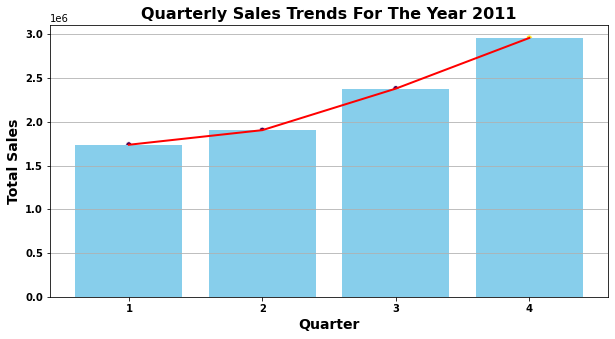

In [16]:
quarter = df1[df1['year_month']!='2010-12'].groupby('Quarter')['Total'].sum().reset_index()

plt.figure(figsize=[10,5])
sns.lineplot(x='Quarter',y='Total',data=quarter,linewidth=2,color='red')
sns.scatterplot(x='Quarter',y='Total',data=quarter,color='Black')
plt.bar(x='Quarter',height='Total',data=quarter,color='skyblue')
plt.title('Quarterly Sales Trends For The Year 2011',weight='bold',fontsize=16)
plt.xlabel('Quarter',weight='bold',fontsize=14)
plt.ylabel('Total Sales',weight='bold',fontsize=14)
plt.yticks(weight='bold')
plt.xticks([1,2,3,4],weight='bold')
plt.grid(axis='y')
None

Sales reached their peak in the fourth quarter, while the first quarter saw the lowest sales.<br><br>
To enhance our comprehension, it would be prudent to perform a monthly sales analysis

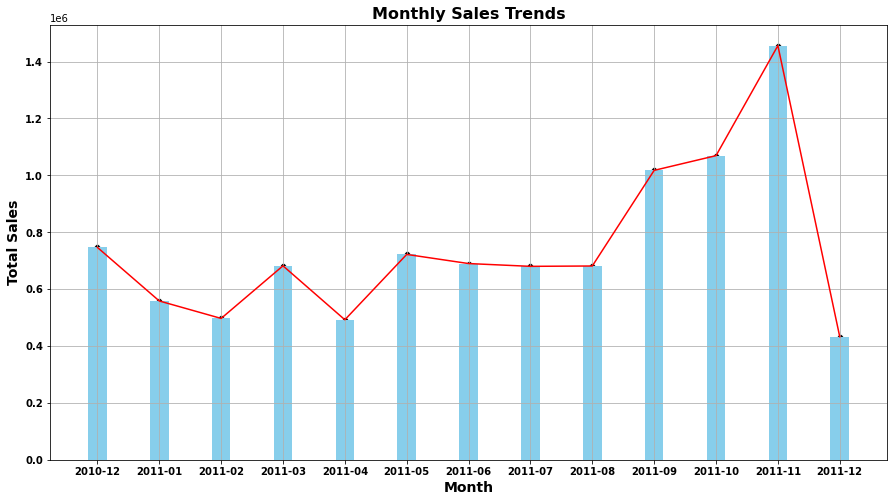

In [17]:
month = df1.groupby('year_month')['Total'].sum().reset_index()

plt.figure(figsize=[15,8])
sns.lineplot(x='year_month',y='Total',data=month,linewidth=1.5,color='red')
sns.scatterplot(x='year_month',y='Total',data=month,color='Black')
plt.bar(x='year_month',height='Total',data=month,color='skyblue',width=0.3)
plt.title('Monthly Sales Trends',weight='bold',fontsize=16)
plt.xlabel('Month',weight='bold',fontsize=14)
plt.ylabel('Total Sales',weight='bold',fontsize=14)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
plt.grid()
None

In November 2011, we observed the highest sales, while December 2011 recorded the lowest sales. <br>
Sales figures remained relatively consistent from June 2011 to August 2011.

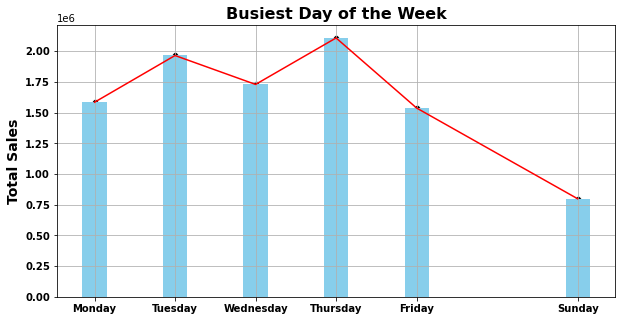

In [18]:
weekday = df1.groupby(['WeekDay','Day'])['Total'].sum().reset_index()

plt.figure(figsize=[10,5])
sns.lineplot(x='WeekDay',y='Total',data=weekday,linewidth=1.5,color='red')
sns.scatterplot(x='WeekDay',y='Total',data=weekday,color='Black')
plt.bar(x='WeekDay',height='Total',data=weekday,color='skyblue',width=0.3)
plt.title('Busiest Day of the Week',weight='bold',fontsize=16)
plt.xlabel('')
plt.ylabel('Total Sales',weight='bold',fontsize=14)
plt.yticks(weight='bold')
plt.xticks(weekday['WeekDay'].values,weekday['Day'].values,weight='bold')
plt.grid()
None

Thursday experiences the highest traffic, while Sunday is the least busy day. <br>
Additionally, there are no sales on Saturdays.

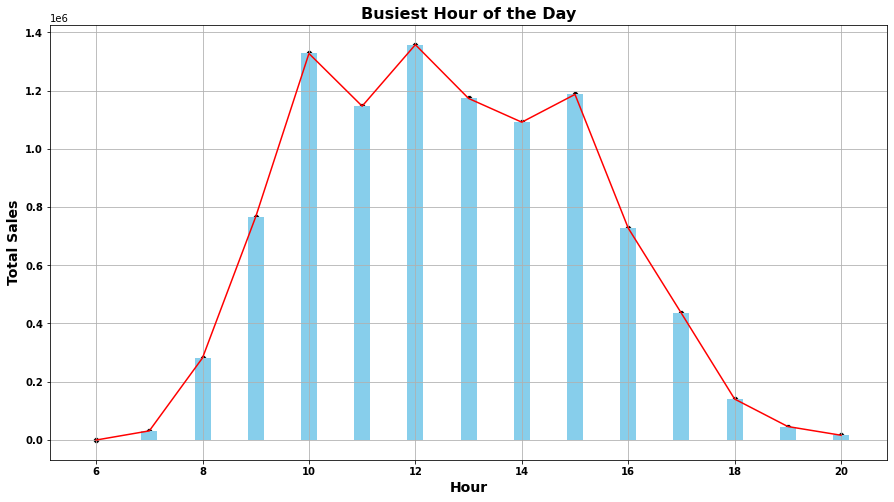

In [19]:
Hour = df1.groupby('Hour')['Total'].sum().reset_index()

plt.figure(figsize=[15,8])
sns.lineplot(x='Hour',y='Total',data=Hour,linewidth=1.5,color='red')
sns.scatterplot(x='Hour',y='Total',data=Hour,color='Black')
plt.bar(x='Hour',height='Total',data=Hour,color='skyblue',width=0.3)
plt.title('Busiest Hour of the Day',weight='bold',fontsize=16)
plt.xlabel('Hour',weight='bold',fontsize=14)
plt.ylabel('Total Sales',weight='bold',fontsize=14)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
plt.grid()
None

The peak sales hours are from 10 AM to 4 PM, with 12 PM to 1 PM being the busiest hour, closely followed by 10 AM to 11 AM.

In [20]:
Date = df1.groupby('Date')['Total'].sum().reset_index().sort_values('Total',ascending=False).head(10)
Date.style.hide_index().format({"Total": "{:20,.0f}"}).set_properties(**{'border': '1.3px solid black','color': 'blue',
                                                         'background-color': 'lightblue'}).set_caption('Top 10 Highest Sellings Days of the Year')

Date,Total
2011-11-14,"111,959"
2011-09-20,"109,228"
2011-12-08,"81,294"
2011-11-23,"78,224"
2011-10-05,"75,112"
2011-12-07,"74,953"
2011-08-11,"72,072"
2011-11-29,"72,008"
2011-03-29,"70,531"
2011-11-07,"69,825"


## Task 6 : Explore the top-selling products and countries based on the quantity sold.

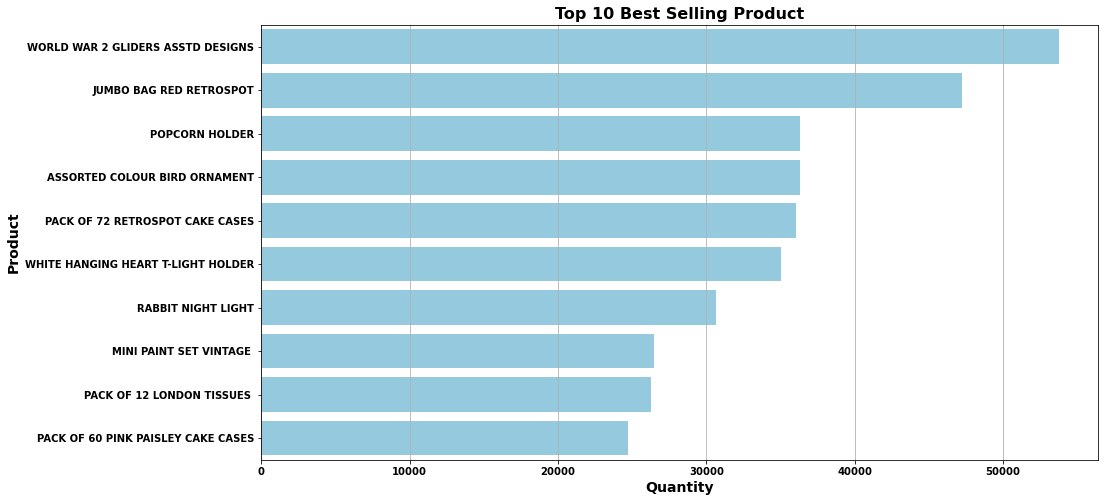

In [21]:
top_selling_product = df1.groupby(['StockCode','Description'])['Quantity'].sum()\
                        .reset_index().sort_values('Quantity',ascending = False).head(10)

plt.figure(figsize=[15,8])
sns.barplot(y='Description',x='Quantity',color='skyblue',data=top_selling_product)
plt.title('Top 10 Best Selling Product',weight='bold',fontsize=16)
plt.ylabel('Product',weight='bold',fontsize=14)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
plt.xlabel('Quantity',weight='bold',fontsize=14)
plt.grid(axis='x')
None

In [22]:
monthly_product = df1.groupby(['year_month','StockCode','Description'])['Quantity'].sum().reset_index()

top_monthly_product=pd.DataFrame()
for i in monthly_product['year_month'].unique():
    df = monthly_product[monthly_product['year_month']==i]
    top_monthly_product=top_monthly_product.append(df[df['Quantity']==df['Quantity'].max()])

top_monthly_product = top_monthly_product.rename(columns={'year_month':'Month'})
top_monthly_product.style.hide_index().set_properties(**{'border': '1.3px solid black','color': 'blue',
                                                         'background-color': 'lightblue'}).set_caption('Top-selling product for each of the Month')

Month,StockCode,Description,Quantity
2010-12,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195
2011-01,37413,RETROSPOT TEA SET CERAMIC 11 PC,5568
2011-02,22053,EMPIRE DESIGN ROSETTE,3986
2011-03,85099B,JUMBO BAG RED RETROSPOT,5281
2011-04,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10143
2011-05,22197,SMALL POPCORN HOLDER,6840
2011-06,85123A,ZINC TOP 2 DOOR WOODEN SHELF,4000
2011-07,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3714
2011-08,84879,ASSORTED COLOUR BIRD ORNAMENT,6544
2011-09,85099B,JUMBO BAG RED RETROSPOT,4265


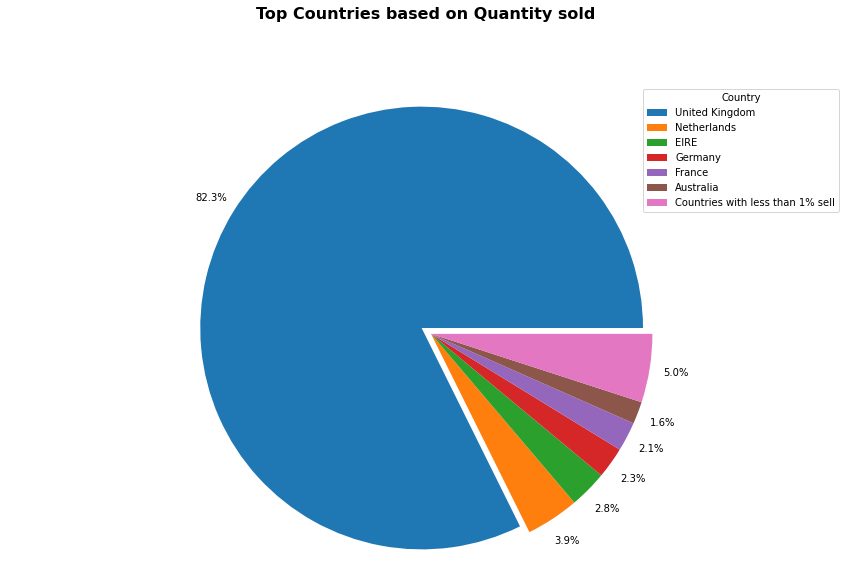

In [23]:
top_country = df1.groupby(['Country'])['Quantity'].sum()\
                        .reset_index().sort_values('Quantity',ascending = False)
top_country['Country'][6:] = 'Countries with less than 1% sell'
top_country=top_country.groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
top_country=top_country.append(top_country.iloc[1]).drop_duplicates(keep='last')

explode_list = [0.05, 0, 0,0,0,0,0]
top_country['Quantity'].plot(kind='pie',
                          figsize=(15, 9),
                          autopct='%1.1f%%',
                          shadow=False,
                          labels=None,
                          pctdistance=1.12,
                          explode=explode_list)
plt.title('Top Countries based on Quantity sold',y=1.12,weight='bold',fontsize=16)
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=top_country['Country'],
           loc='upper right',title='Country')
plt.grid()
plt.show()
None

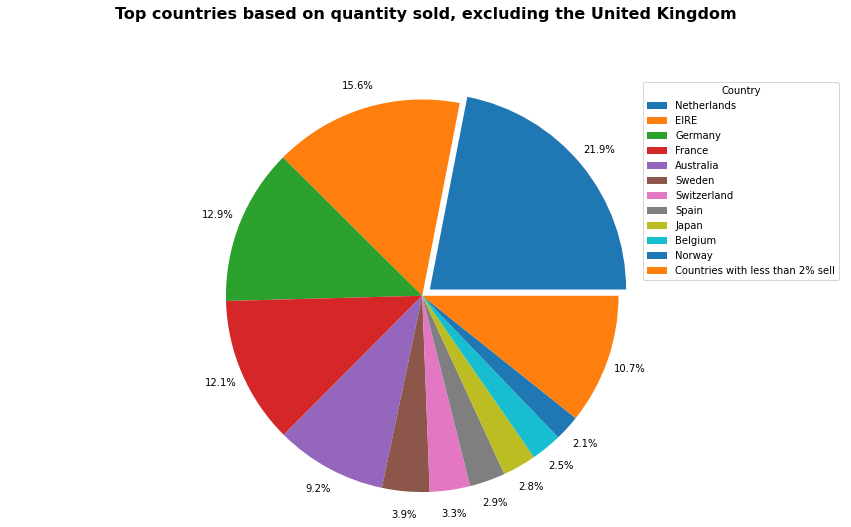

In [24]:
top_country_without_uk = df1.groupby(['Country'])['Quantity'].sum()\
                        .reset_index().sort_values('Quantity',ascending = False)[1:]
top_country_without_uk['Country'][11:] = 'Countries with less than 2% sell'
top_country_without_uk=top_country_without_uk.groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
top_country_without_uk=top_country_without_uk.append(top_country_without_uk.iloc[4]).drop_duplicates(keep='last')

explode_list = [0.05, 0, 0,0,0,0,0,0,0,0,0,0]
top_country_without_uk['Quantity'].plot(kind='pie',
                          figsize=(15, 8),
                          autopct='%1.1f%%',
                          shadow=False,
                          labels=None,
                          pctdistance=1.12,
                          explode=explode_list)
plt.title('Top countries based on quantity sold, excluding the United Kingdom',y=1.12,weight='bold',fontsize=16)
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=top_country_without_uk['Country'],
           loc='upper right',title='Country')
plt.grid()
plt.show()
None

## Task 7 : Draw conclusions and summarize your findings from the exploratory data analysis.

### Sales Trend Identification
  - Sales exhibited their highest point during the fourth quarter, with the first quarter displaying the lowest sales figures.
  - November 2011 marked the peak in sales, while December 2011 reported the lowest sales.
  - The highest sales were recorded on November 14, 2011.
  - Sales figures remained relatively stable from June 2011 to August 2011.
  - Thursday stands out as the busiest day, whereas Sunday remains the least active.
  - Notably, Saturdays register no sales at all.
  - The busiest sales hours fall between 10 AM and 4 PM, with 12 PM to 1 PM being the most bustling, closely followed by 10 AM to 11 AM.

### Other Findings
 - The three best-selling items are "Assorted Designs of World War 2 Gliders," "Red Retrospot Jumbo Bag," and "Popcorn Holder."
 - The top country for quantity sold is the United Kingdom, accounting for 82.3% of the sales, which is unsurprising given that the company is UK-based.
 - The Netherlands stands out as the top country for international sales, accounting for 21.9% of the quantity sold.